In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

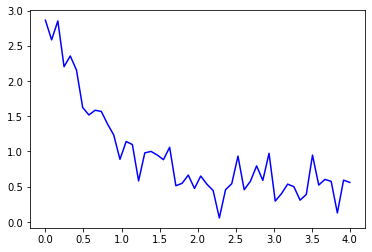

In [2]:
#Define the data to be fit with some noise:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='noise-data')
plt.show()

# curve_fit : 
## 语法
**scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=- inf, inf, method=None, jac=None, \*\*kwargs)**
### f 
目标拟合函数，可以自己 def / 直接调用
### xdata 
拟合数据的 **自变量** ，对于多变量函数，可以使用(k,m)的数组
### ydata 
欲拟合的数据
### p0 
参数的长度(N)的初始猜测值。
### sigma 
*ydata* 中的不确定性，


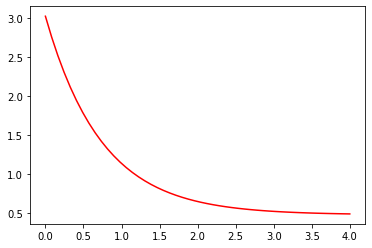

In [3]:
#Fit for the parameters a, b, c of the function func:
popt1, pcov1 = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt1), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1))
plt.show()

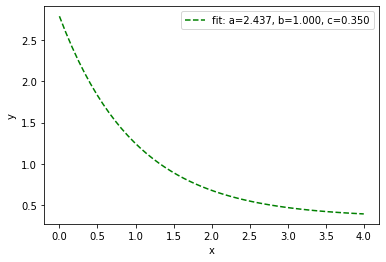

In [4]:
#Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:
popt2, pcov2 = curve_fit(func, xdata, ydata, bounds=(0, [3., 1.,0.5]))
plt.plot(xdata, func(xdata, *popt2), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

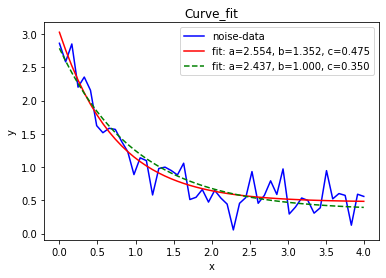

In [7]:

plt.title('Curve_fit')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xdata, ydata, 'b-', label='noise-data')
plt.plot(xdata, func(xdata, *popt1), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1))
plt.plot(xdata, func(xdata, *popt2), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
plt.legend()
plt.show()